In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse=cv2.imread("horse.jpg")
show_horse=cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)

rainbow=cv2.imread("rainbow.jpg")
show_rainbow=cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks=cv2.imread("bricks.jpg")
show_bricks=cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

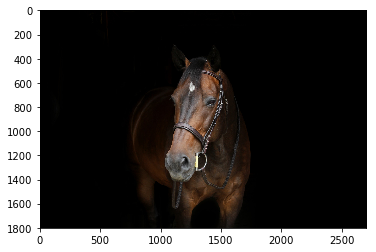

In [3]:
plt.imshow(show_horse)

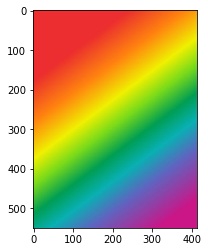

In [4]:
plt.imshow(show_rainbow)

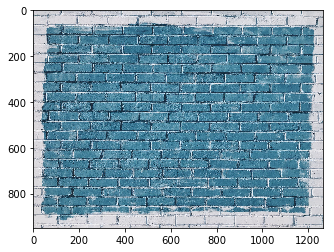

In [5]:
plt.imshow(show_bricks)

In [6]:
'''
OpenCV Histogram

cv2.calcHist(images, channels, mask, histSize, ranges, hist[, accumulate]])

    images: it is the source image of type uints or float32. it should be given in square brackets, 
    ie, "[img]".
    channels: it is also given in square brackets. It is the index of channel for which we 
    calculate histogram. For example, if input is grayscale image, its value is [0]. 
    For color image, you can pass [0], [1] or [2] t o calculate histogram of blue, green or 
    red channel respectively. 
    mask: mask image. To find histogram of full image, it is given as "None". But if you want to 
    find histogram of particular region of image, you have to create a mask image for that and 
    give it as mask. (I will show a n example later.)

    histSize: this represents our BIN count. Need to be given in square brackets. For full scale, 
    we pass [256].
    ranges: this is our RANGE. Normally, it is [0,256].
'''

'\nOpenCV Histogram\n\ncv2.calcHist(images, channels, mask, histSize, ranges, hist[, accumulate]])\n\n    images: it is the source image of type uints or float32. it should be given in square brackets, \n    ie, "[img]".\n    channels: it is also given in square brackets. It is the index of channel for which we \n    calculate histogram. For example, if input is grayscale image, its value is [0]. \n    For color image, you can pass [0], [1] or [2] t o calculate histogram of blue, green or \n    red channel respectively. \n    mask: mask image. To find histogram of full image, it is given as "None". But if you want to \n    find histogram of particular region of image, you have to create a mask image for that and \n    give it as mask. (I will show a n example later.)\n\n    histSize: this represents our BIN count. Need to be given in square brackets. For full scale, \n    we pass [256].\n    ranges: this is our RANGE. Normally, it is [0,256].\n'

In [7]:
hist_values=cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

### 0: Blue, 1: Green, 2: red

In [8]:
hist_values.shape  # 256 hist size and 1 channel

(256, 1)

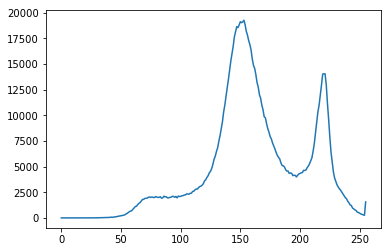

In [9]:
# Let us visualize the  contribution of the blue channel
plt.plot(hist_values)

In [10]:
# For  Green channel
hist_values=cv2.calcHist([blue_bricks],channels=[1],mask=None,histSize=[256],ranges=[0,256])

In [11]:
hist_values.shape  # 256 hist size and 1 channel

(256, 1)

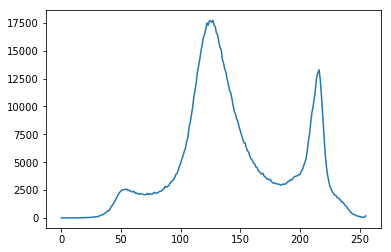

In [12]:
# Let us visualize the  contribution of the green channel
plt.plot(hist_values)

In [13]:
### For the dark_horse

In [14]:
# For  
hist_values=cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [15]:
hist_values.shape  # 256 hist size and 1 channel

(256, 1)

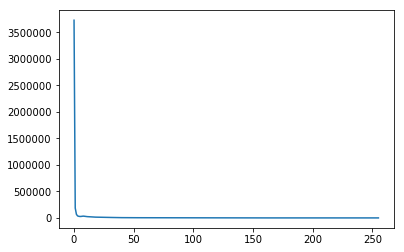

In [16]:
# Let us visualize the  contribution of the green channel
plt.plot(hist_values)

### ALl 3 channel visualizatiom

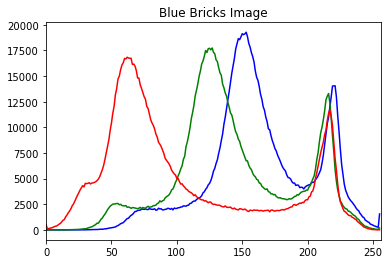

In [17]:
img=blue_bricks
color=('b','g','r')

for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Blue Bricks Image")
plt.show()

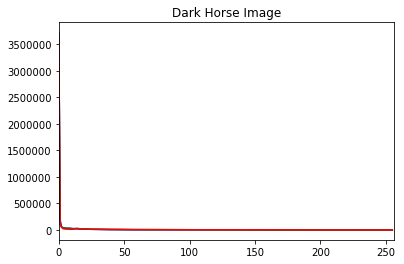

In [18]:
img=dark_horse
color=('b','g','r')

for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Dark Horse Image")
plt.show()

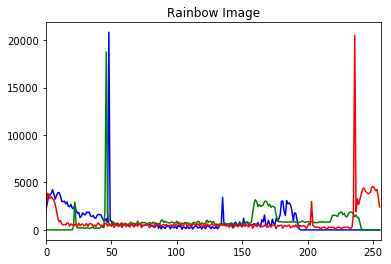

In [19]:
img=rainbow
color=('b','g','r')

for i, col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Rainbow Image")
plt.show()

In [20]:
# In Rainbow image contribution of red, blue, green varies

## Masking 

In [21]:
## We can mask only certain parts of the image

In [22]:
img=rainbow

In [23]:
img.shape

(550, 413, 3)

In [24]:
# We want only (550, 413) the you can write image.shape[:2]

In [25]:
# Create the mask
mask=np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

In [26]:
print(mask.dtype) # check mask data type
mask=mask.astype('uint8') # Convert mask to uint8 if necessary

uint8


In [27]:
show_rainbow_resized=cv2.resize(show_rainbow,(mask.shape[1],mask.shape[0]))

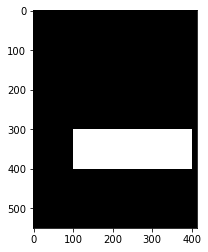

In [28]:
plt.imshow(mask, cmap='gray')

In [29]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow_resized,show_rainbow_resized,mask=mask)

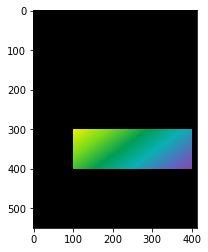

In [30]:
plt.imshow(show_masked_img)

### Recompute the Histogram for rainbow

In [31]:
hist_mask_value_red=cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_value_red=cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'Histogram for RED values of the full image')

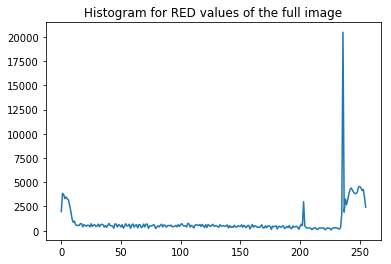

In [32]:
plt.plot(hist_full_value_red)
plt.title("Histogram for RED values of the full image")

### 2nd masking example: Show the gorilla eyes

In [33]:
img=cv2.imread('gorilla.jpg')

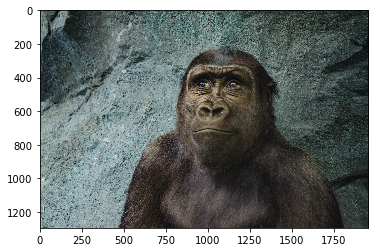

In [34]:
plt.imshow(img)

In [35]:
img.shape

(1295, 1955, 3)

In [36]:
# Create the mask
mask=np.zeros(img.shape[:2], np.uint8)
mask[400:500, 780:1250] = 255

In [37]:
print(mask.dtype) # check mask data type
mask=mask.astype('uint8') # Convert mask to uint8 if necessary

uint8


In [38]:
show_gorilla_resized=cv2.resize(img,(mask.shape[1],mask.shape[0]))

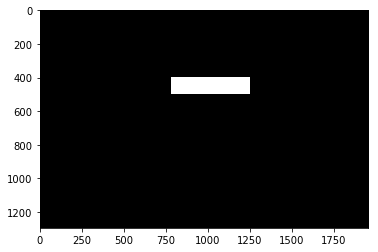

In [39]:
plt.imshow(mask, cmap='gray')

In [40]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_gorilla_resized,show_gorilla_resized,mask=mask)

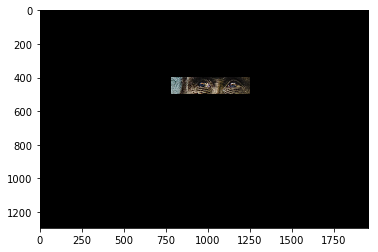

In [41]:
plt.imshow(show_masked_img)

In [42]:
############################################################

In [44]:
gorilla=cv2.imread('gorilla.jpg',0)
'''
Here's a brief overview of the different options for this argument:

0: Read the image in grayscale mode.
1: Read the image in color mode (default), resulting in a 3-channel image
-1: Read the image with the alpha channel, if it exists, I
resulting in a 4-channel image.

In your case, using 0 will load gorilla.jpg as a grayscale image.
'''

"\nHere's a brief overview of the different options for this argument:\n\n0: Read the image in grayscale mode.\n1: Read the image in color mode (default), resulting in a 3-channel image\n-1: Read the image with the alpha channel, if it exists, I\nresulting in a 4-channel image.\n\nIn your case, using 0 will load gorilla.jpg as a grayscale image.\n"

In [50]:
def display(img, cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

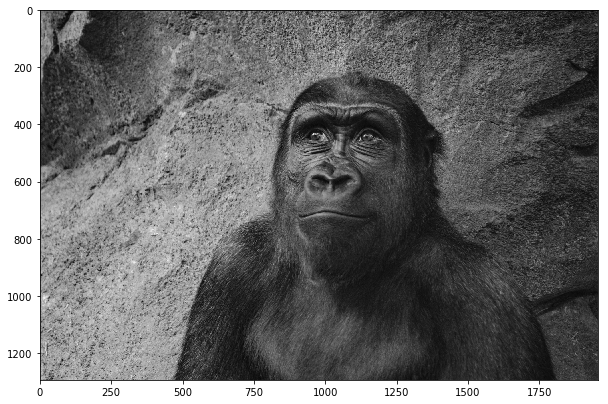

In [51]:
display(gorilla, cmap='gray')

In [54]:
hist_values=cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
'''
[gorilla]:
This is the image (or list of images) for which you want to calculate the 

channels=[0]:
This specifies the index of the channel you want to compute the histogram for. Since the image is grayscale, 
it has only one channel, which is indexed as 0.
For color images, you could specify [0] for the blue channel, [1] for the green channel, and [2] for the red channel.
'''


'\n[gorilla]:\nThis is the image (or list of images) for which you want to calculate the \n\nchannels=[0]:\nThis specifies the index of the channel you want to compute the histogram for. Since the image is grayscale, \nit has only one channel, which is indexed as 0.\nFor color images, you could specify [0] for the blue channel, [1] for the green channel, and [2] for the red channel.\n'

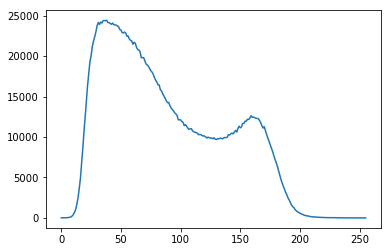

In [56]:
plt.plot(hist_values)

In [57]:
eq_gorilla=cv2.equalizeHist(gorilla)

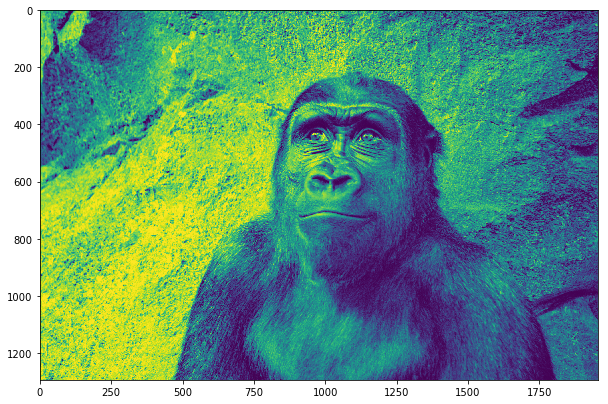

In [58]:
display(eq_gorilla)

In [59]:
hist_values=cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

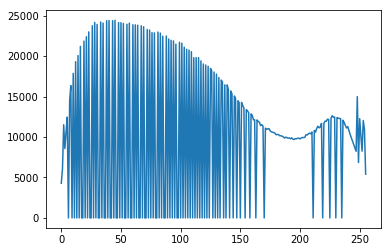

In [60]:
plt.plot(hist_values)

In [62]:
# Color Image 
color_gorilla = cv2.imread("gorilla.jpg")
show_gorilla=cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to the HSV
hsv=cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV )

In [63]:
hsv[1,1,2]

124

In [64]:
show_gorilla

array([[[125, 127, 113],
        [119, 121, 107],
        [113, 115, 101],
        ...,
        [ 40,  43,  32],
        [ 39,  42,  31],
        [ 39,  42,  31]],

       [[119, 121, 107],
        [122, 124, 110],
        [121, 123, 109],
        ...,
        [ 44,  47,  36],
        [ 46,  49,  38],
        [ 48,  51,  40]],

       [[116, 118, 104],
        [127, 129, 115],
        [129, 131, 117],
        ...,
        [ 44,  47,  36],
        [ 47,  50,  39],
        [ 50,  53,  42]],

       ...,

       [[196, 196, 186],
        [197, 197, 185],
        [183, 184, 168],
        ...,
        [ 52,  55,  48],
        [ 52,  55,  48],
        [ 52,  55,  48]],

       [[184, 184, 172],
        [184, 185, 171],
        [182, 181, 163],
        ...,
        [ 48,  51,  44],
        [ 49,  52,  45],
        [ 50,  53,  46]],

       [[172, 173, 159],
        [170, 168, 153],
        [173, 172, 152],
        ...,
        [ 46,  49,  42],
        [ 47,  50,  43],
        [ 47,  50,  43]]

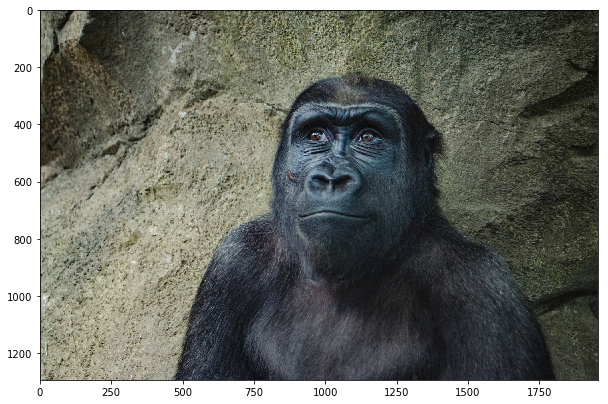

In [67]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) 
display(eq_color_gorilla)

In [70]:
hist_values=cv2.calcHist([eq_color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])

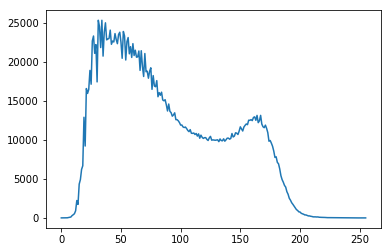

In [71]:
plt.plot(hist_values)